# BCB 546X: Python Assignment Details

## ** Your Mission: Complete Python code in a Jupyter Notebook ** 

### -- Functions --
 1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook.
 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.
 3. Write an alternative translation function.
 4. Write a function that calculates the molecular weight of each 3 amino acid sequence.
 5. Write a function that computes the GC-content of each DNA sequence.

### -- In the MAIN part of the script --
 6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
 7. Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.
 8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: What is the smallest penguin species? What else is interesting about this species?
 9. Plot a graph that shows the molecular weight as a function of GC content. 
 10. Write the entire DataFrame to a new CSV file that includes your new columns.
 11. **BONUS**: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. (0.5 additional points if your total score is < 15).

### -- Additional Instructions (points will be deducted if these instructions are not heeded) --
* Do all of this in a Jupyter notebook and push it to a GitHub repository.
* Read all comments carefully and answer the questions by including information in your Jupyter notebook.
* Document all of your code (and Dr. X's code) very thoroughly so that it is clear what you did.
* Be sure to cite (by providing URLs or other appropriate citations) information appropriately in your documented notebook.
* Commit and push your completed work in the Jupyter notebook to your repository.
* Submit the URL to your git repository via Canvas by the end of the day on November 27, 2019.

## -- Disclaimer --
Not all of these tasks have been covered in class and you will have to use online resources to find out how to do some of these tasks.

#### Summary of tasks (delete later)
* ~~do docstrings for each of the functions~~
* ~~Write function to translate sequences to amino acids~~
* ~~write a simpler function using biopython library~~
* ~~write function to calclulate weight of amino acid sequence~~
* ~~write function to find %GC content~~
* ~~add columns for this info to dataframe~~
* ~~write for-loop to calculate these values for each ~~
* ~~bar chart of mass vs species~~
* ~~plot MW vs GC content~~
* save new CSV file to include new columns

# Python Translate Script
Here's the start of our Python script. Thanks for completing it for me! - Dr. X

**IMPORTANT**: install BioPython so that this will work

In [3]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

## FUNCTIONS

In [ ]:
## 1 ##
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.

### Function `get_sequences_from_file(fasta_fn)`
#### Description
Obtain sequences from a fasta file and match them with the corresponding species name.

#### Details
This code uses `Bio.SeqIO.parse()` to read sequence data as a SeqRecord object*, using the arguments 'filename' and 'filetype'. Each record is broken up at the spaces, making the indices [1] and [2] correspond to the genus and species, respectively. The full species name is saved to the empty dictionary with its matching .seq file. The filled dictionary is returned after the loop is completed.

#### Parameters
* `fasta_fn` : .fasta sequence file

#### Output
* `sequence_data_dict` : dictionary of species names and .seq files


*source: http://biopython.org/DIST/docs/tutorial/Tutorial.html

In [109]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"): #first argument is filename, second is filetype
        description = record.description.split() #break up each record @ the spaces, index 1 & 2 are genus & species
        species_name = description[1] + " " + description[2] #combine the genus and species names, with a space between
        sequence_data_dict[species_name] = record.seq #define a dictionary entry by species name, assign a .seq file to it based on record name.
    return(sequence_data_dict) #return the filled dictionary

In [ ]:
## 2 ##

####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
#         this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

### Function `translate_function`
#### Description
Convert a string of nucleotide sequence to a string of amino acid sequence using the 'Vertebrate Mitochondrial' codon table.

#### Details
This code first recreates the string of nucleotides as a string of codons, with a space between every set of 3 nucleotides. 'num_codons' is defined as the length of the original string divided by 3, then rounded down to the integer in case there are any incomplete codons. A loop is done through the range of num_codons, and the variable 'codon' is defined as the item in 'codons' with index [i]. If the codon is a stop codon, the loop skips to the next iteration. Otherwise, the codon is translated to an amino acid using the Codon Table. This is added to an initially empty string 'aa_seq_string'. After the loop is completed, 'aa_seq_string' is returned.

#### Parameters
* `string_nucleotides` : Nucleotide sequence in string format.

#### Output
* `aa_seq_string` : Amino acid sequence in string format.

In [65]:
import math #import math for the rounding-down function below
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #define variable as desired codon table
    codons = ' '.join([string_nucleotides[i:i+3] for i in range(0, len(string_nucleotides), 3)]) #recreate nucleotide string as codon string by adding a space every 3 characters.
    codons = codons.split() #separate codons into separate elements
    num_codons = (math.floor(len(string_nucleotides)/3)) # number of codons is length of the whole string divided by 3. math.floor ensure this number is always an integer by rounding down in the case of an incomplete codon.
    aa_seq_string = "" #define a string with no characters or spaces
    for i in range(num_codons): 
        codon = codons[i] #defines a codon in the sequence
        if codon is ("TAA", "TAG", "AGA", "AGG"): # if a codon is a stop codon, exit loop and return string
            pass
        else:
            aa = mito_table.forward_table[codon] # translate codon into an amino acid using the codon table chosen above
            aa_seq_string += aa # add amino acid to the growing string of aa's
    return aa_seq_string #return the completed string of amino acids

In [ ]:
### 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

### Function `translate_alternative`
#### Description
Convert a string of nucleotide sequence to a string of amino acid sequence with the 'Vertebrate Mitochondrial' codon table using the biopython tool 'translate'*.

#### Parameters
* `string_nucleotides` : Nucleotide sequence in string format.

#### Output
* `aa_seq_string` : Amino acid sequence in string format.


*source: https://biopython.org/DIST/docs/api/Bio.Seq-module.html

In [118]:
from Bio.Seq import Seq
def translate_alternative(string_nucleotides):
    aa_seq_string = string_nucleotides.translate(table="Vertebrate Mitochondrial",to_stop=True) # use biopython tools to translate nucleotide string to amino acids
    return aa_seq_string #return translated string

In [2]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

### Function `compute_molecular_weight`
#### Description
Find the molecular weight of a protein from a string of its amino acid sequence.

#### Parameters
* `aa_seq` : Sequence of amino acids, may or may not be in string format to begin with.

#### Output
* `MW` : Molecular weight of the protein.

*source used for coding help: https://biopython.org/wiki/Seq

In [127]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis #import protein analysis package
from Bio.SeqUtils import molecular_weight 
def compute_molecular_weight(aa_seq):
    #seq_string = str(aa_seq) #if sequence is not already in string format, convert it
    MW = molecular_weight(aa_seq) # find the molecular weight of the protein based on the amino acid sequence.
    return MW

In [ ]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence 
## and returns this value.

### Function `compute_gc_content`
#### Description
Find the %GC content of a sequence from a string of its nucleotides.

#### Parameters
* `string_nucleotides` : Nucleotide sequence in string format.

#### Output
* `gc_percent` : Percent GC content (out of 100)


*Source used to find Bio.SeqUtils.GC() https://people.duke.edu/~ccc14/pcfb/biopython/BiopythonSequences.html

In [68]:
from Bio.SeqUtils import GC #import GC tool from Biopython SeqUtils
def compute_gc_content(string_nucleotides):
    gc_percent = GC(string_nucleotides) # find %GC content of string_nucleotides
    return gc_percent

## MAIN

In [139]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
penguins_copy = penguins_df.copy()
species_list = list(penguins_df.species)

In [140]:
## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

In [141]:
import numpy as np
for index, row in penguins_copy.iterrows(): # iterate through the rows of the dataframe
    penguins_copy.loc[index,'molecular.weight'] = np.nan # create column called 'molecular.weight', fill with NaN
    penguins_copy.loc[index,'percent.GC'] = np.nan # create column called 'percent.GC', fill with NaN

In [142]:
penguins_copy

,species,mass,molecular.weight,percent.GC
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


In [143]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

In [144]:
mol_wt = [] #initialize empty list for molecular weights
perc_GC = [] #initialize empty list for %GC content
for key, value in cytb_seqs.items(): #iterate through each sequence
    aa_seq = translate_alternative(value) #translate nucleotide sequence to amino acids
    MW = compute_molecular_weight(aa_seq) #calculate molecular weight of amino acid sequence
    GC_percent = compute_gc_content(value) #calculate percent GC content in nucleotide sequence
    mol_wt.append(MW) #append MW result to mol_wt list
    perc_GC.append(GC_percent) #append %GC result to perc_GC list

In [145]:
for index, row in penguins_copy.iterrows(): # iterate through the rows of the dataframe
    penguins_copy.loc[index,'molecular.weight'] = mol_wt[index]
    penguins_copy.loc[index,'percent.GC'] = perc_GC[index]

In [146]:
penguins_copy

,species,mass,molecular.weight,percent.GC
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.6140,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.5490,48.293963


In [147]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## *Q2* What else is interesting about this species?

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
%matplotlib inline

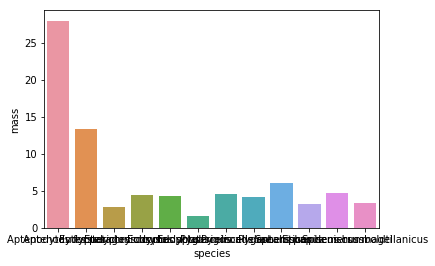

In [150]:
sns.barplot(penguins_copy['species'],penguins_copy['mass']) # plot mass on y-axis and species on x-axis

Too hard to read! time to make a column of abbreviations. 
Abbreviations are made as follows: First letter of genus, first letter of species, last letter of species

In [151]:
for index, row in penguins_copy.iterrows(): # iterate through the rows of the dataframe
    nickname_list = ['AFI','APS','ECE','ECS','ESI','EMR','PAE','PAA','PPA','SDS','SHI','SMS'] #list of abbreviations
    penguins_copy.loc[index,'species.abbreviation'] = nickname_list[index] #assign corresponding abbreviation to place in column

In [152]:
penguins_copy

,species,mass,molecular.weight,percent.GC,species.abbreviation
0,Aptenodytes forsteri,28.00,42459.6021,48.381452,AFI
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788,APS
2,Eudyptes chrysocome,2.80,42475.5753,51.181102,ECE
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635,ECS
4,Eudyptes sclateri,4.25,42475.5753,50.831146,ESI
5,Eudyptula minor,1.60,42491.6408,49.256343,EMR
6,Pygoscelis adeliae,4.60,42458.6140,49.081365,PAE
7,Pygoscelis antarctica,4.10,42404.5423,47.769029,PAA
8,Pygoscelis papua,6.10,42595.8759,47.156605,PPA
9,Spheniscus demersus,3.20,42431.5490,48.293963,SDS


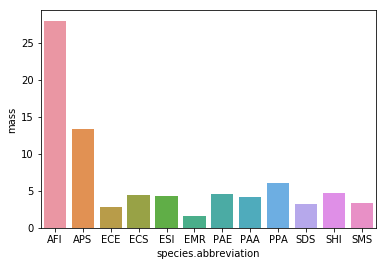

In [153]:
sns.barplot(penguins_copy['species.abbreviation'],penguins_copy['mass']) #plot with abbreviation on the axis

Above, each species on the x-axis (listed under an abbreviation of their name) is plotted against their mass on the y-axis.

_Questions_

**Q1** What is the smallest penguin species? 

**Q2** What else is interesting about this species?

1. Eudyptula minor is the smallest species.

2. ddd

In [ ]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

### Graphing MW vs %GC

Used the lmplot function from seaborn to create a scatterplot with percent GC content on the x-axis and molecular weight on the y-axis. The datapoints were then colored based on their species

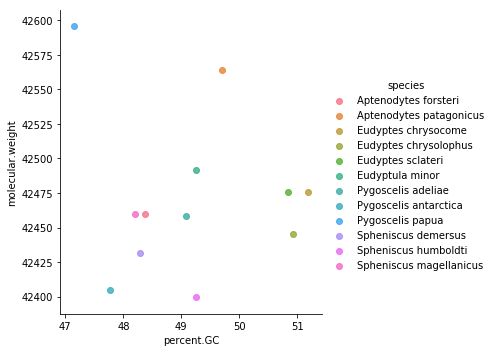

In [155]:
sns.lmplot("percent.GC", "molecular.weight", data=penguins_copy, fit_reg=False,hue='species')

In [ ]:
## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [ ]:
## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)